In [1]:
import pandas as pd 

df = pd.read_csv('shopping-data.csv')

In [2]:
df

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40
...,...,...,...
195,196,120,79
196,197,126,28
197,198,126,74
198,199,137,18


In [7]:
X = df.iloc[:,1:] ## all colmuns except the CustomerID	

In [8]:
X.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


In [10]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler(feature_range=(1,99))
TX = scaler.fit_transform(X)

In [12]:
X['Income'] = TX[:,0]
X['Score']  =  TX[:,1]

In [13]:
X

,Annual Income (k$),Spending Score (1-100),Income,Score
0,15,39,1.000000,39.0
1,15,81,1.000000,81.0
2,16,6,1.803279,6.0
3,16,77,1.803279,77.0
4,17,40,2.606557,40.0
...,...,...,...,...
195,120,79,85.344262,79.0
196,126,28,90.163934,28.0
197,126,74,90.163934,74.0
198,137,18,99.000000,18.0


In [20]:
from sklearn.cluster import KMeans 

X = X[['Income','Score']]

from sklearn.metrics import silhouette_score
n_range_cluster = [2,3,4,5,6,7,8]
max_silhouette_socer = 0 
best_n_cluster = 0 

for i in n_range_cluster: 
    model = KMeans(n_clusters=i)
    model.fit(X)
    # print("Label",model.labels_)
    silhouette_avg =silhouette_score(X,model.labels_)
    if silhouette_avg > max_silhouette_socer: 
        max_silhouette_socer = silhouette_avg 
        best_n_cluster = i 
print("Best silhouette ",max_silhouette_socer)
print("Best K ",best_n_cluster)

Best silhouette  0.5429594895956008
Best K  6


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

In [21]:
model = KMeans(n_clusters=best_n_cluster,random_state=0)
model.fit(X)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6, random_state=0)

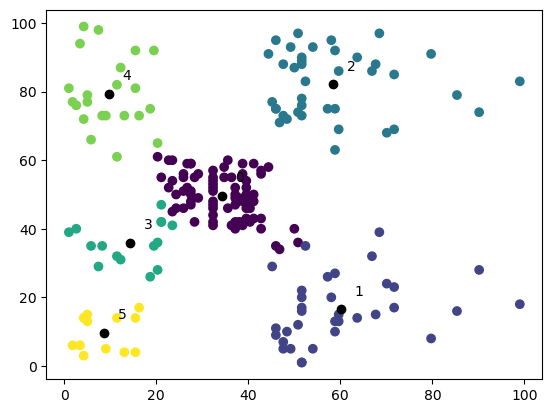

In [30]:
import matplotlib.pyplot as plt 
X1 = X['Income']
X2 = X['Score']
plt.scatter(X1,X2,c=model.labels_)
xCenters = model.cluster_centers_[:,0]
yCenters = model.cluster_centers_[:,1]
plt.scatter(xCenters,yCenters,color='black')


for i in range(best_n_cluster):
    plt.annotate(
        i,
        xy=(xCenters[i],yCenters[i]),
        textcoords='offset points',
        xytext=(10,10)
    )

plt.show()

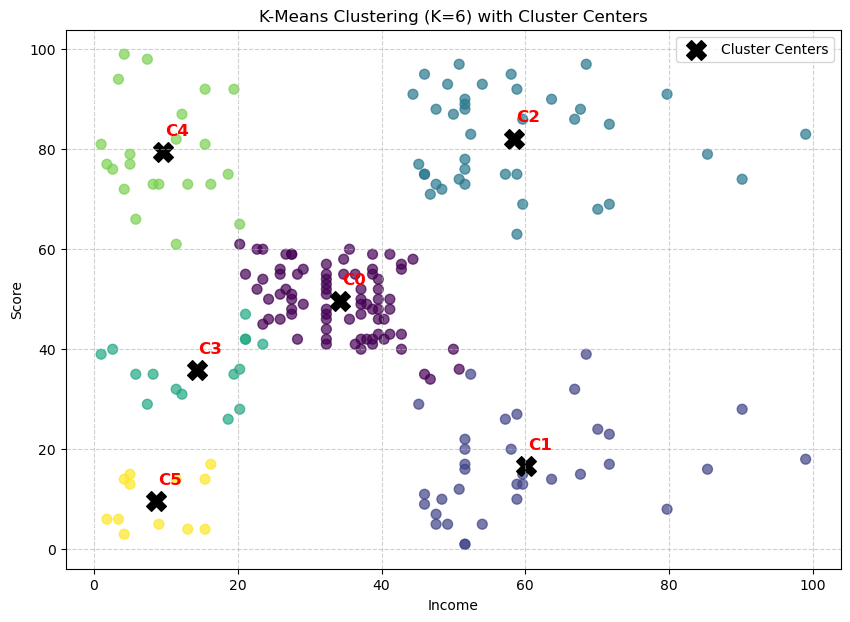

In [31]:
# Now, use the best_model obtained from the loop for plotting
# If you didn't store best_model, you would re-fit:
# final_model = KMeans(n_clusters=best_n_cluster, random_state=42, n_init=10)
# final_model.fit(X)
# model_labels = final_model.labels_
# cluster_centers = final_model.cluster_centers_

# Using the stored best_model:
model_labels = model.labels_
cluster_centers = model.cluster_centers_

plt.figure(figsize=(10, 7)) # Makes the plot a bit larger and easier to read
plt.scatter(X['Income'], X['Score'], c=model_labels, cmap='viridis', s=50, alpha=0.7) # Added cmap, s, alpha for better visualization
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], color='black', marker='X', s=200, label='Cluster Centers') # Changed marker and size

for i in range(best_n_cluster):
    plt.annotate(
        f'C{i}', # Label clusters as C0, C1, etc.
        xy=(cluster_centers[i,0], cluster_centers[i,1]),
        textcoords='offset points', # Corrected typo here
        xytext=(10,10),
        ha='center', # Horizontal alignment
        va='bottom', # Vertical alignment
        fontsize=12,
        fontweight='bold',
        color='red'
    )

plt.title(f'K-Means Clustering (K={best_n_cluster}) with Cluster Centers')
plt.xlabel('Income')
plt.ylabel('Score')
plt.grid(True, linestyle='--', alpha=0.6) # Add a grid
plt.legend() # Show the label for cluster centers
plt.show()

In [32]:
cluster_map = pd.DataFrame()

In [38]:
cluster_map['CustomerID'] = df['CustomerID']
cluster_map['cluster'] =model.labels_
cluster_map.groupby('cluster').count()

,CustomerID
cluster,
0,78
1,34
2,39
3,15
4,22
5,12
